## Association Claim

Examine how to analyze data for a correlation. Here, I focus on correlation.

In the example, analyzing customer loyalty data. Your organization uses three measures of loyalty, and you wish to test them out. (To avoid discussions of popular real measures, we will name these loytalty1, loyalty2, and loyalty3).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [3]:
data = pd.read_csv('datasets/loyaltydata.csv')
data

,Unnamed: 0,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4
...,...,...,...,...
995,996,9,12,5
996,997,11,12,5
997,998,10,13,5
998,999,9,11,5


In [12]:
data.describe(include='all')

,Unnamed: 0,loyalty1,loyalty2,loyalty3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,9.960000,10.449000,5.072000
std,288.819436,1.043786,1.332357,1.045901
min,1.000000,7.000000,7.000000,2.000000
25%,250.750000,9.000000,10.000000,4.000000
50%,500.500000,10.000000,10.000000,5.000000
75%,750.250000,11.000000,11.000000,6.000000
max,1000.000000,13.000000,16.000000,8.000000


In [8]:
print('loyalty1\n' + str(data['loyalty1'].value_counts()))
print('loyalty2\n' + str(data['loyalty2'].value_counts()))
print('loyalty3\n' + str(data['loyalty3'].value_counts()))

loyalty1
10    380
9     250
11    235
8      68
12     54
13      7
7       6
Name: loyalty1, dtype: int64
loyalty2
10    293
11    264
9     174
12    150
13     48
8      48
7      12
14      9
16      1
15      1
Name: loyalty2, dtype: int64
loyalty3
5    384
4    245
6    237
7     76
3     42
8     10
2      6
Name: loyalty3, dtype: int64


In [13]:
data.dropna(inplace=True)
len(data)

1000

In [21]:
# Calculate the correlation bwteen them
corr_map = data[['loyalty1', 'loyalty2', 'loyalty3']].corr().round(3)
corr_map

,loyalty1,loyalty2,loyalty3
loyalty1,1.000,0.396,0.499
loyalty2,0.396,1.000,0.574
loyalty3,0.499,0.574,1.000


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

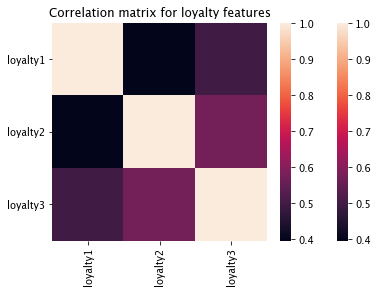

In [24]:
# Visualize the correlations
sns.heatmap(corr_map, vmax=1.0)
plt.title('Correlation matrix for loyalty features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

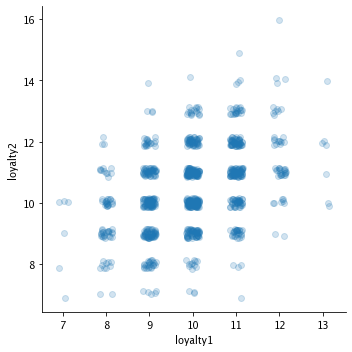

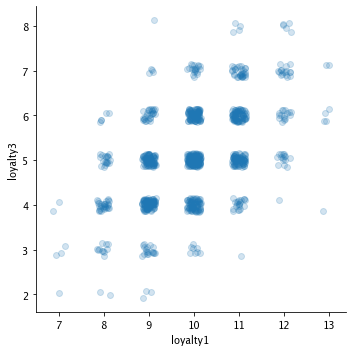

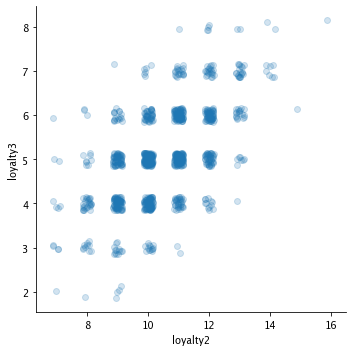

In [27]:
# Create scatter plots of each pairwise combination of loyalty variables
def plot_scatter_for_two(var1, var2, data):
    sns.lmplot(var1, var2, data, x_jitter=.15, y_jitter=.15, scatter_kws={'alpha':0.2}, fit_reg = False)
    
plot_scatter_for_two('loyalty1', 'loyalty2', data)
plot_scatter_for_two('loyalty1', 'loyalty3', data)
plot_scatter_for_two('loyalty2', 'loyalty3', data)

All of the graphs look about the same. It is always good to inspect the
plots, as we know that non-linearity can weaken our correlations. Here,
we see evidence that each measure is correlated linearly; the
associations are simply underwhelming.

We can easily compute the confidence intervals of these correlation coefficients. 
1. Transform the correlation from the initial space which we call r to a transformed space z. The distribution of errors is Normal in this transformed space. 
2. Compute the CI in the transformed space.
3. Transform back to the original space.

In [29]:
def r_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

print('\nFor loyalty1 vs. loyalty2')
corr_mat = np.array(corr_map)
conf_ints = r_conf_int(corr_mat[1,0], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[1,0], conf_ints[0], conf_ints[1]))
print('\nFor loyalty1 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,0], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[2,0], conf_ints[0], conf_ints[1]))
print('\nFor loyalty2 vs. loyalty3')
conf_ints = r_conf_int(corr_mat[2,1], 0.05, 1000)
print('Correlation = %4.3f with CI of %4.3f to %4.3f' % (corr_mat[2,1], conf_ints[0], conf_ints[1]))


For loyalty1 vs. loyalty2
Correlation = 0.396 with CI of 0.342 to 0.447

For loyalty1 vs. loyalty3
Correlation = 0.499 with CI of 0.451 to 0.544

For loyalty2 vs. loyalty3
Correlation = 0.574 with CI of 0.531 to 0.614


You can see that the CIs of all the correlation coefficients are relatively small compared to the correlation coefficients. This indicates that these coefficients are statistically significant.